Name: David James

In [1]:
import matplotlib.pyplot as plt
import odeSolver as os
import linAlg as la
import numpy as np

***Problem 4***

BVP:
$$ y'' - 2y' + y = x e^x - x $$
Where $x \in [0,2], y(0)=0, y(2) = -4, h = 0.2 $

The exact solution is
$$ y(x) = \frac{1}{6}x^3e^x - \frac{5}{3}xe^x + 2xe^x - x - 2$$

In [2]:
p = -2
q = 1
fprime = lambda x : x*np.exp(x)-x
f = lambda x : 1/6*x**3*np.exp(x) - 5/3*x*np.exp(x) + 2*np.exp(x) - x - 2

In [3]:
ta = 0
ya = 0

tb = 2
yb = -4
h = [0.2,0.1,0.05]
values0 = {}
values1 = {}

for i in range(len(h)):
    y,x = os.solveODE2(fprime,p,q,ta,ya,tb,yb,h=h[i])
    values0[i] = [x,y]
    values1[i] = [x,f(x)]

In [4]:
error = {}

for i in range(len(h)):
    error[i] = values1[i][1] - values0[i][1]

0-Norm [0.00959349374046381, 0.002392441262815126, 0.0006001770140731111]
1-Norm [0.04514949955221262, 0.022849386617206244, 0.011425930170335191]
2-Norm [0.016987981640832928, 0.005899958637427496, 0.002075017297127794]
Note: 0-Norm is the infty-Norm


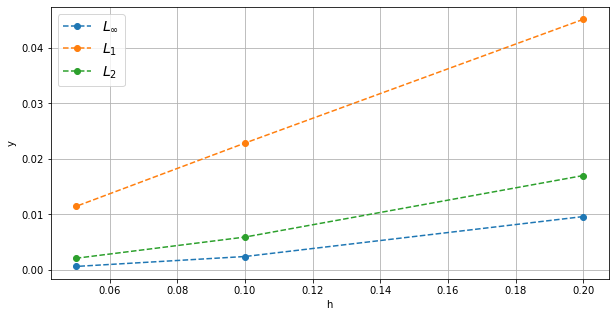

In [7]:
plt.figure(figsize=(10,5))

for i in range(3):
    norm = []
    for j in range(3):
        norm.append(la.vectorNorm(error[j],i))

    plt.plot(h,norm,'C'+str(i)+'--o')
    print(str(i)+'-Norm',norm)

print('Note: 0-Norm is the infty-Norm')
plt.xlabel('h')
plt.ylabel('y')
plt.grid()
plt.legend(labels=('$L_{\infty}$','$L_1$','$L_2$'),fontsize=14)